### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

### Import 'df_merged.csv'

In [2]:
df_merged = pd.read_csv(r'C:\Myra\CareerFoundry\Data Immersion\Achievment 6\Task 1\df_merged.csv', index_col = False)

### Picking variables for exploratory visual analysis

In [3]:
df_merged.shape

(239677, 26)

In [4]:
df_merged.head()

,incident_id,month,year,state,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,...,suspect,victim,unknown_type,latitude,longitude,incident_url,source_url,sources,state_house_district,state_senate_district
0,461105,Jan,2013,Pennsylvania,3,1,1,0,0,5,...,1,4,0,40.3467,-79.8559,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,Jan,2013,California,1,0,4,0,0,4,...,1,4,0,33.9090,-118.3330,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,Jan,2013,Ohio,5,0,0,0,0,5,...,2,3,0,41.4455,-82.1377,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,Jan,2013,Colorado,3,1,0,0,0,4,...,1,3,0,39.6518,-104.8020,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,Jan,2013,North Carolina,2,2,0,0,1,3,...,1,3,0,36.1140,-79.9569,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [5]:
df_merged.isnull().sum() # these null values will be addressed later. For now, we do not need them for visualization purposes

incident_id                  0
month                        0
year                         0
state                        0
male_count                   0
female_count                 0
unknown_gender               0
child_0-11                   0
teen_12-17                   0
adult_18+                    0
unknown_age_group            0
arrested                     0
injured                      0
killed                       0
unharmed                     0
unknown_status               0
suspect                      0
victim                       0
unknown_type                 0
latitude                  7923
longitude                 7923
incident_url                 0
source_url                 468
sources                    609
state_house_district     38772
state_senate_district    32335
dtype: int64

In [6]:
# Selecting specific columns
subset = df_merged[['male_count', 'female_count', 'unknown_gender', 'child_0-11', 'teen_12-17', 'adult_18+', 'unknown_age_group', 'arrested', 'injured', 'killed', 'unharmed', 'unknown_status', 'suspect', 'victim']]

In [7]:
subset.head()

,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim
0,3,1,1,0,0,5,0,1,4,0,0,0,1,4
1,1,0,4,0,0,4,1,0,3,1,0,1,1,4
2,5,0,0,0,0,5,0,2,3,1,2,0,2,3
3,3,1,0,0,0,4,0,0,0,4,0,0,1,3
4,2,2,0,0,1,3,0,0,2,2,0,0,1,3


## Correlation matrix

In [8]:
# Creating a correlation matrix 
subset.corr()

,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim
male_count,1.000000,0.032706,-0.114416,0.058089,0.190798,0.735148,0.120521,0.390213,0.271188,0.207348,0.614812,0.058735,0.660859,0.441798
female_count,0.032706,1.000000,-0.029461,0.156745,0.072816,0.359904,0.009055,0.140438,0.165599,0.203490,0.218663,0.012657,0.189840,0.346855
unknown_gender,-0.114416,-0.029461,1.000000,0.069111,0.080008,0.040803,0.524648,0.092884,0.196049,-0.026168,0.198177,0.240118,0.229577,0.263298
child_0-11,0.058089,0.156745,0.069111,1.000000,0.013264,0.010233,-0.015645,-0.011055,0.060576,0.069935,0.088903,0.000984,0.018430,0.188484
teen_12-17,0.190798,0.072816,0.080008,0.013264,1.000000,-0.096737,-0.032953,0.181984,0.105792,0.025168,0.168814,-0.005392,0.181988,0.128965
adult_18+,0.735148,0.359904,0.040803,0.010233,-0.096737,1.000000,-0.191730,0.385235,0.286316,0.281472,0.553876,-0.004873,0.569323,0.505240
unknown_age_group,0.120521,0.009055,0.524648,-0.015645,-0.032953,-0.191730,1.000000,0.026836,0.145387,-0.069317,0.231712,0.319830,0.291690,0.181465
arrested,0.390213,0.140438,0.092884,-0.011055,0.181984,0.385235,0.026836,1.000000,-0.118549,-0.016307,0.516072,-0.060990,0.652778,-0.122271
injured,0.271188,0.165599,0.196049,0.060576,0.105792,0.286316,0.145387,-0.118549,1.000000,-0.125402,-0.146908,-0.048073,-0.102825,0.691517
killed,0.207348,0.203490,-0.026168,0.069935,0.025168,0.281472,-0.069317,-0.016307,-0.125402,1.000000,-0.109742,-0.048612,-0.015812,0.373854


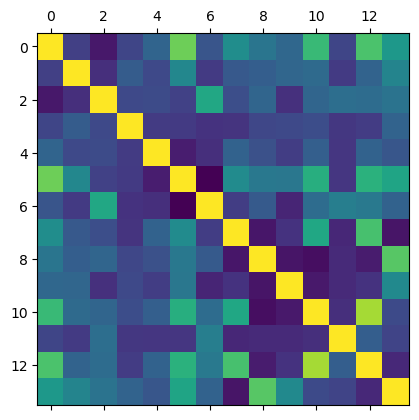

In [9]:
# Creating a correlation heatmap using matplotlib
plt.matshow(subset.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

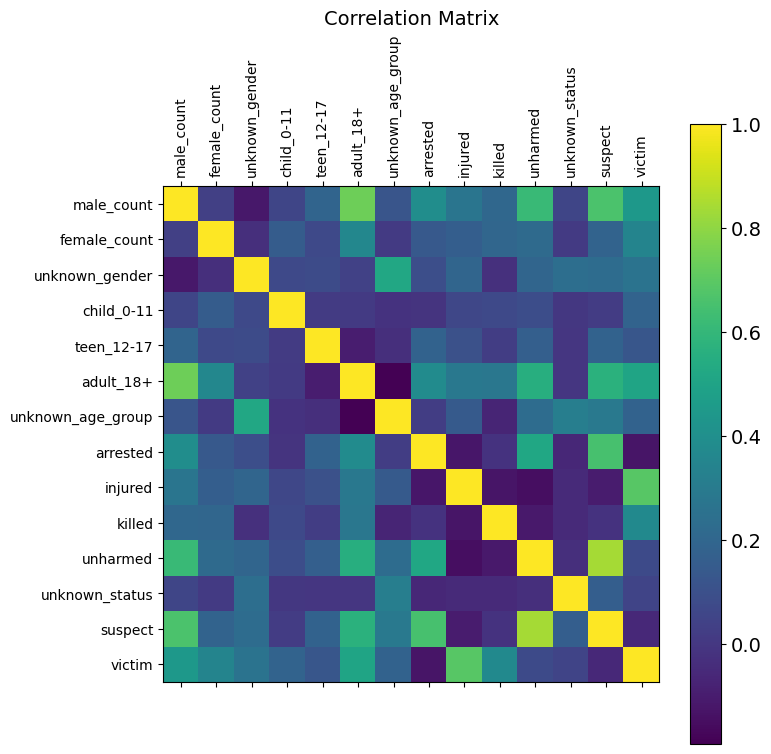

In [10]:
# Adding labels, a legend, and changing the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(subset.corr(), fignum=f.number) # type of plot
plt.xticks(range(subset.shape[1]), subset.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(subset.shape[1]), subset.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

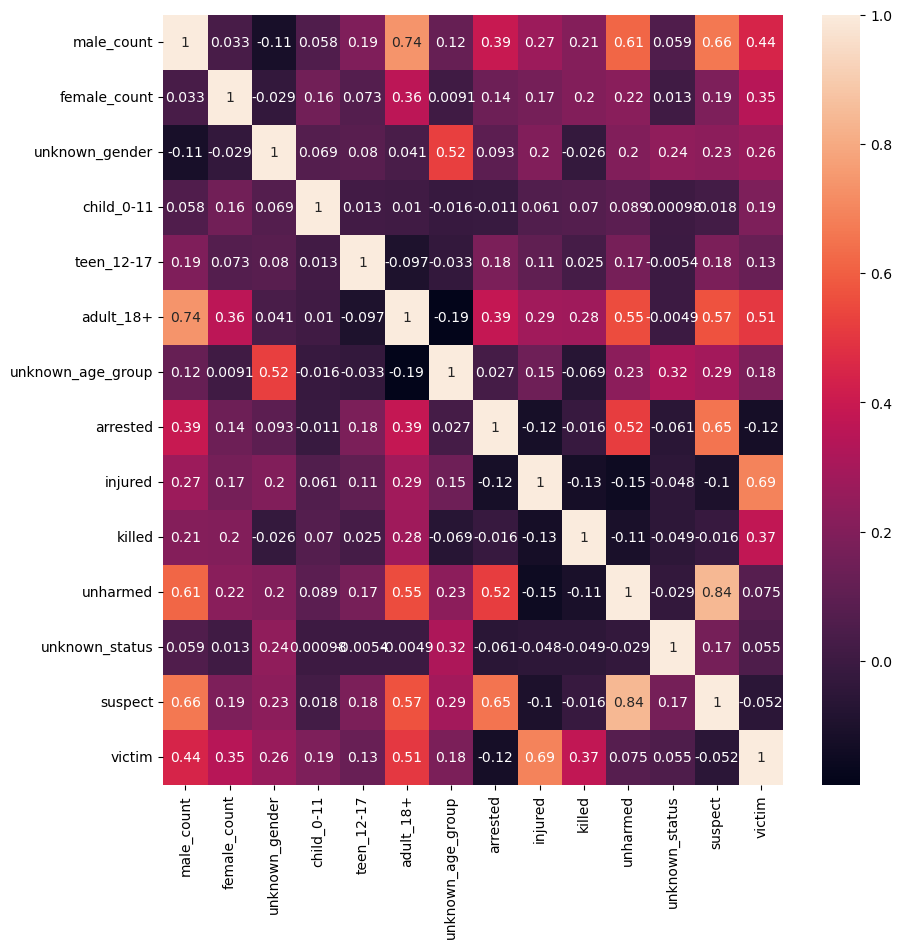

In [11]:
# Creating correlation heatmap using seaborn

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(subset.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In the heatmap above, there are only selective few variables that have a correlation. The darker the shade, the less correlation there is and the lighter the shade, a stronger positive correlation there is among the variables.

The age group of adult_18+ and male_count (number of males involved in a gun violence incident) has a positive association. As one variable increases the other also increases. 
The suspect and those arrested also have a positive association. 

## Scatterplots

### Scatterplot of number of males involved in a gun violence incident and people with age 18+

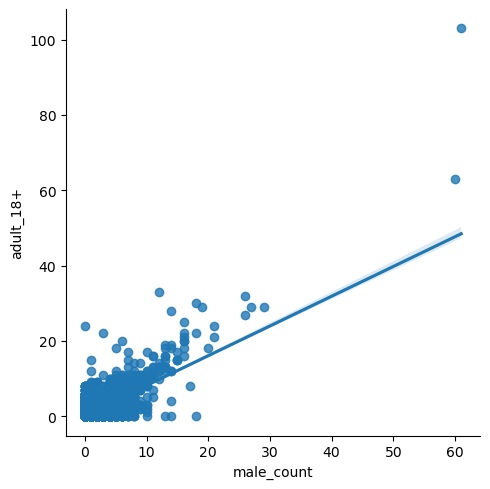

In [12]:
# Creating a scatterplot for the "male_count" and "adult_18+" columns in seaborn

sns.lmplot(x = 'male_count', y = 'adult_18+', data = subset)

The two variables - adult_18+ and male_count have a positive correlation. However, most of the plots are from 0 to 20 on both axis. There are two points, however, that have are an outlier in the scatterplot and have a male_count of around 60 and count of adults aged 18+ around 60 and 100.

### Scatterplot of suspects that were arrested

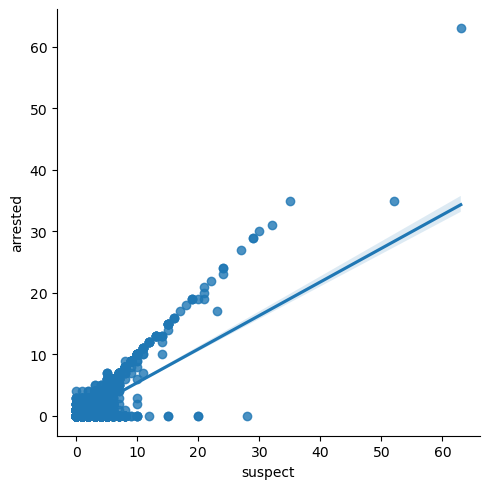

In [13]:
# Creating a scatterplot for the "suspect" and "arrested" columns in seaborn

sns.lmplot(x = 'suspect', y = 'arrested', data = subset)

The scatterplot above shows a positive correlation between suspects and those arrested. However, the plot also shows that some suspects were not arrested, which is effecting the trend line.  

### Scatterplot of suspect that were unharmed

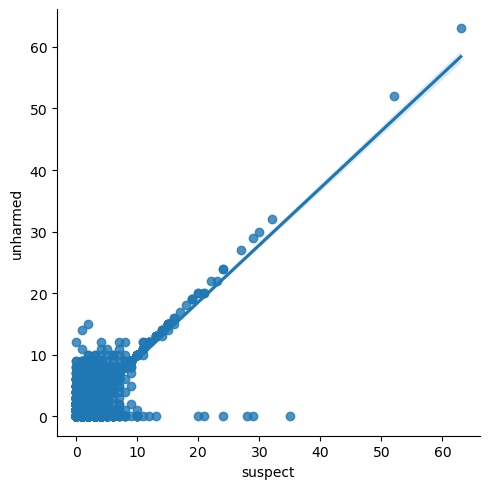

In [14]:
# Creating a scatterplot for the "suspect" and "unharmed" columns in seaborn

sns.lmplot(x = 'suspect', y = 'unharmed', data = subset)

There is also a positive correlation between suspects that are unharmed, although there are many plots that show that many suspects were not harmed. 

### Pair plot 

In [15]:
print(subset.columns)

Index(['male_count', 'female_count', 'unknown_gender', 'child_0-11',
       'teen_12-17', 'adult_18+', 'unknown_age_group', 'arrested', 'injured',
       'killed', 'unharmed', 'unknown_status', 'suspect', 'victim'],
      dtype='object')


In [16]:
subset_2 = subset[['male_count', 'female_count', 'adult_18+', 'arrested', 'killed', 'injured', 'unharmed', 'suspect', 'victim']]

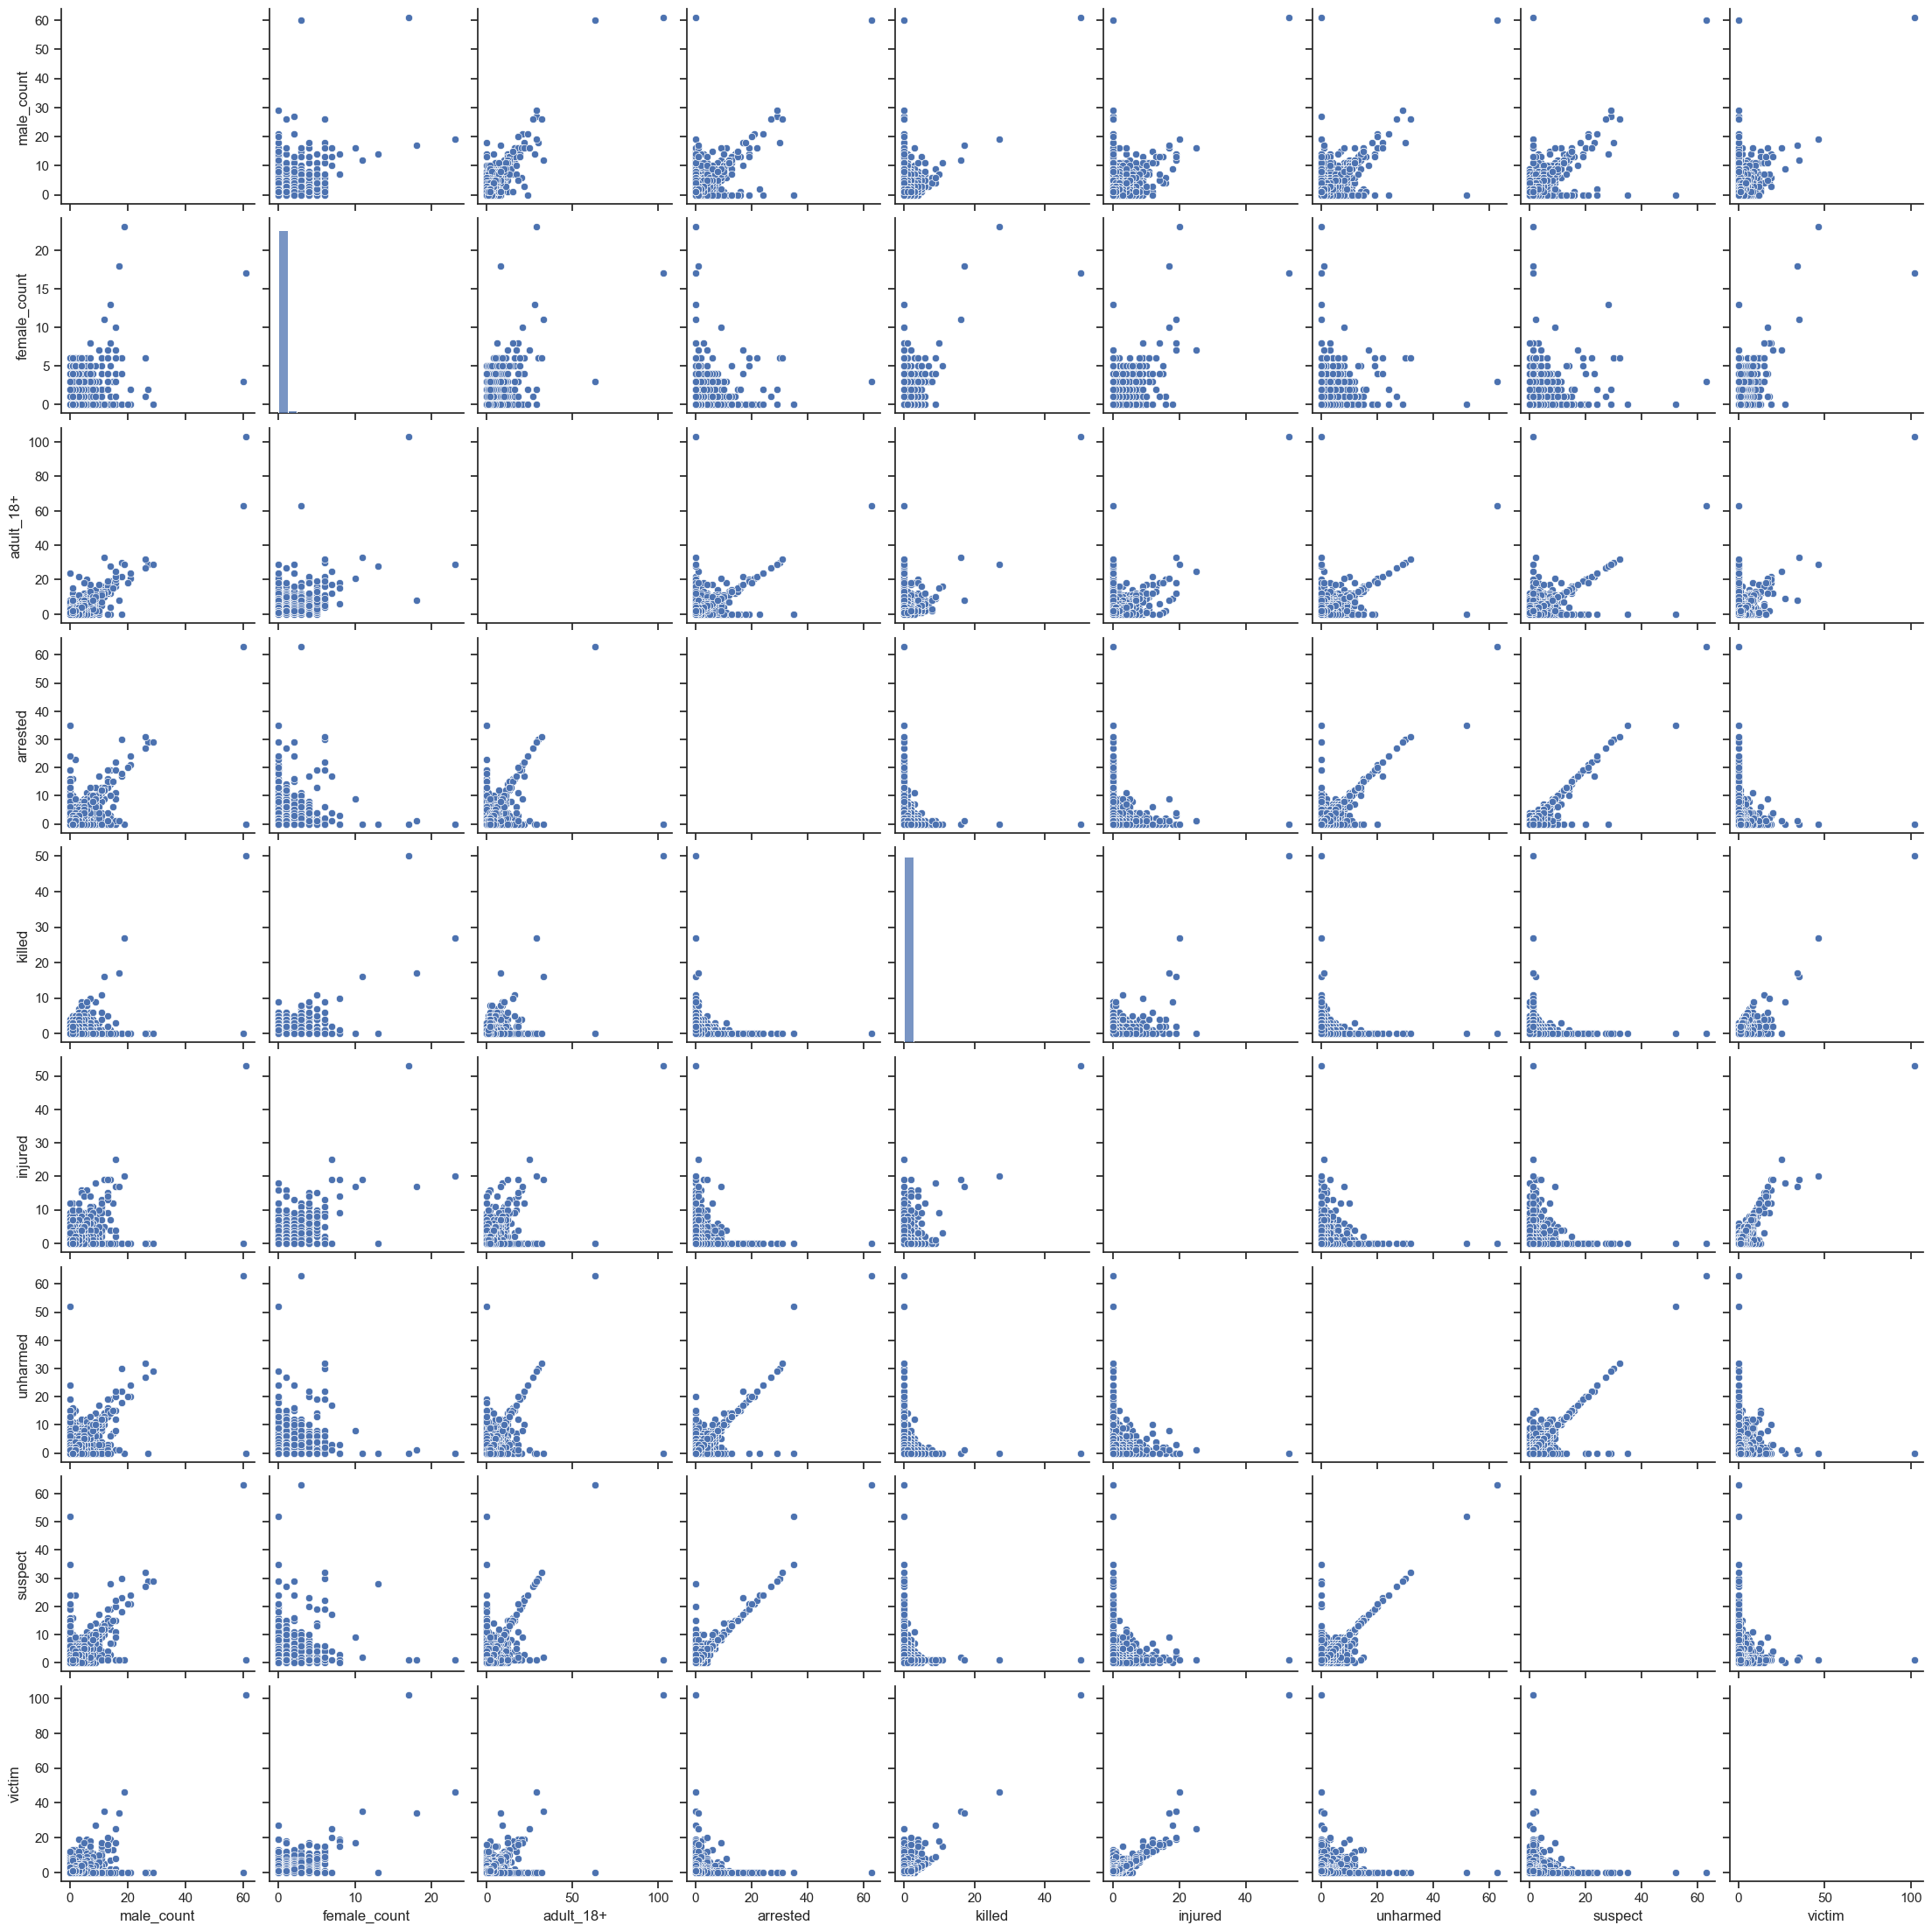

In [32]:
g = sns.pairplot(subset_2)

The relationship between gender and other variables, such as the status of the individuals involved or the type of incident, could provide insights into potential gender-related patterns or disparities.

Further exploration of the relationship between gender and the status of the individuals involved or the type of incident, could provide insights into potential gender-related patterns or disparities.

### Categorical plot

<Axes: xlabel='victim', ylabel='Count'>

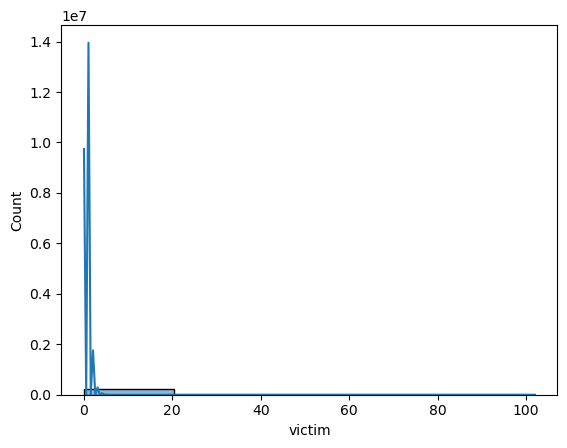

In [18]:
# Using a histogram to visualize the distribution of the variables. 

sns.histplot(subset_2['victim'], bins = 5, kde = True)

In [19]:
# Taking out the summary statistics for the column

subset['victim'].describe()

count    239677.000000
mean          0.805501
std           0.839808
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max         102.000000
Name: victim, dtype: float64

In [20]:
subset_2.loc[subset_2['victim'] == 0, 'victim_category'] = 'No victim'
subset_2.loc[subset_2['victim'] == 1, 'victim_category'] = 'One victim'
subset_2.loc[subset_2['victim'] == 2, 'victim_category'] = 'Two victims'
subset_2.loc[subset_2['victim'] > 2, 'victim_category'] = 'More than two victims'

C:\Users\Myra Ahsan\AppData\Local\Temp\ipykernel_17188\960830584.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_2.loc[subset_2['victim'] == 0, 'victim_category'] = 'No victim'


In [21]:
subset_2['victim_category'].value_counts(dropna = False)

One victim               128813
No victim                 84414
Two victims               19616
More than two victims      6834
Name: victim_category, dtype: int64

In [24]:
print(subset_2.columns)

Index(['male_count', 'female_count', 'adult_18+', 'arrested', 'killed',
       'injured', 'unharmed', 'suspect', 'victim', 'victim_category'],
      dtype='object')


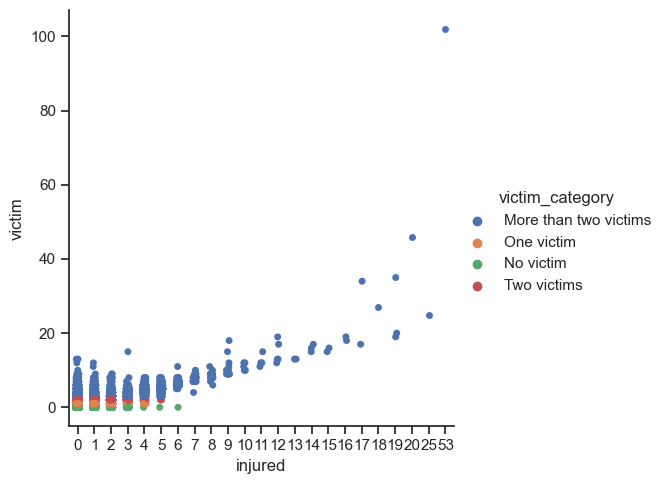

In [26]:
# Creating a categorical plot in seaborn using the victim categories created above

sns.set(style="ticks")
g = sns.catplot(x="injured", y="victim", hue="victim_category", data=subset_2)

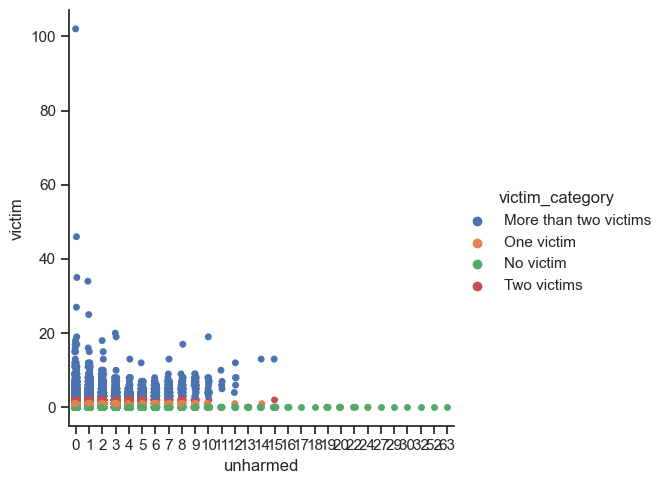

In [29]:
sns.set(style="ticks")
g = sns.catplot(x="unharmed", y="victim", hue="victim_category", data=subset_2)

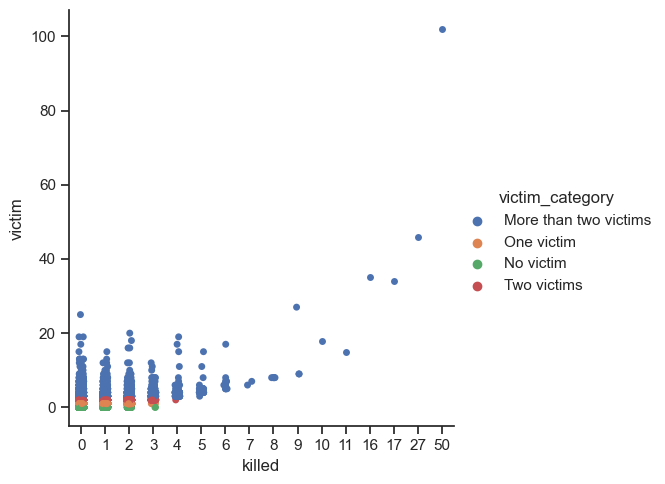

In [30]:
sns.set(style="ticks")
g = sns.catplot(x="killed", y="victim", hue="victim_category", data=subset_2)

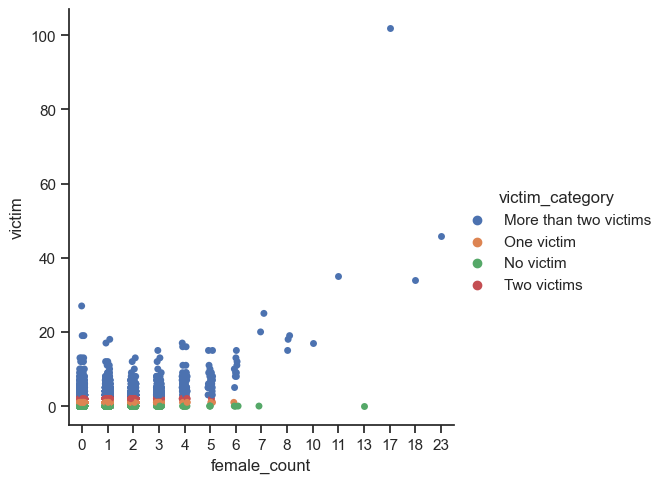

In [31]:
sns.set(style="ticks")
g = sns.catplot(x="female_count", y="victim", hue="victim_category", data=subset_2)

Although the totals of each incident of gun violence are given, for example, number of females involved, number of people killed or injured etc, there is no number specifically females that were killed or females that were the suspect. The categorical plot helps to explore and understand the distribution or relationship of data within different categories.

All the questions I had in the analysis were focused on temporal and spatial aspects. Unfortunately, the current analysis does not provide the necessary information to answer those questions accurately. As a result, further exploration and analysis are required to address the inquiries related to time and location.

##### Hypothesis

The number of individuals arrested is positively correlated with the number of individuals killed or injured in gun violence incidents.

##### Explanation

This hypothesis suggests that incidents resulting in higher casualties are more likely to lead to arrests due to increased attention and law enforcement efforts.